<a href="https://colab.research.google.com/github/somalayashwanthreddy/personalised-cancer-diagnosis/blob/main/traficsignal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing pickle library and loading train and test data

In [50]:
import seaborn as sns
import pickle

In [51]:
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)

In [52]:
with open("/content/test.p",mode='rb') as testing_data:
  test = pickle.load(testing_data)

In [53]:
with open("/content/train.p",mode='rb') as training_data:
  train = pickle.load(training_data)

In [54]:
xtrain,ytrain=train['features'],train['labels']
xvalid,yvalid=valid['features'],valid['labels']
xtest,ytest=test['features'],test['labels']

In [55]:
xtrain.shape

(34799, 32, 32, 3)

### Here 34799 is no of samples 32,32,3 is we have a matrix of length 32 and width 32 and 3 is showing that our pictures are colored. So, RGB

### Data Normalisation.
we have RGB colored photo.so we are making it grayscale.So, what we do is we normalise the values for each ie, R+G+B/3 and make it grayscale.
And also we shuffle the data beacuse the data in the dataset may be linear ie, all of one group may be together .But it is not the case in real world . So, here we stimulte the real world examples

In [81]:
 from sklearn.utils import shuffle
 xtrain,ytrain=shuffle(xtrain,ytrain)
 

## Data normalisation

In [57]:
xtrain_gray=np.sum(xtrain/3,axis=3,keepdims=True)

In [58]:
xtrain_gray.shape

(34799, 32, 32, 1)

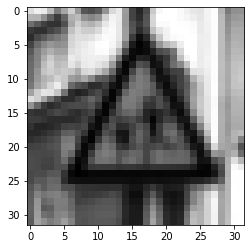

In [82]:
plt.imshow(xtrain_gray[100].squeeze(),cmap='gray')
# here we used squeeze because each point is 32*32*1 shape but gray scale requires onlu 32*32 So,we squeezed

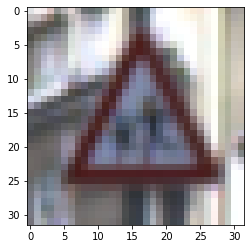

In [60]:
plt.imshow(xtrain[100])

In [83]:
# similar to train we did to test and validation data as well
xtest_gray=np.sum(xtest/3,axis=3,keepdims=True)
xvalid_gray=np.sum(xvalid/3,axis=3,keepdims=True)

#### NOTE: 
Now we have values in matrices ranging from 0-255. So,we need to normalise it for better performance and also to deal with outliers causing so much of problem and deviation to our problem.So, we are subtracting the pixel values by 128 and dividing by 128 .so that all the values ranges from -1 to 1

In [62]:
xtrain_gray=(xtrain_gray-128)/128
xtest_gray=(xtest_gray-128)/128
xvalis_gray=(xvalid_gray-128)/128

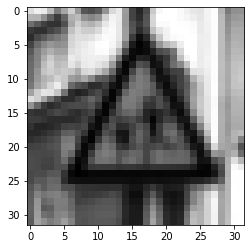

In [63]:
plt.imshow(xtrain_gray[100].squeeze(),cmap='gray')

###Model training

In [64]:
# here we are using keras which is like API which sits on top of Tensorflow.

In [65]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard 

In [66]:
model = Sequential()
#convolution layer 1
model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
#avgpooling
model.add(AveragePooling2D())
#convolutional layer 2
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
#Avgplooling  for downsampling
model.add(AveragePooling2D())
# flattening the data
model.add(Flatten())
# dense layer with 120 hidden neurons
model.add(Dense(units=120,activation='relu'))
#dense layer with 84 hidden neurons
model.add(Dense(units=84,activation='relu'))
#dense layer with 43 hidden neurons
model.add(Dense(units=43,activation='softmax'))


In [67]:
# training the model

In [68]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [69]:
history=model.fit(xtrain_gray,ytrain,batch_size=500,epochs=100,verbose=1,validation_data=(xvalid_gray,yvalid))
#fitting the model and storing all the data that it produces to history

Epoch 1/100
70/70 [==============================] - 17s 222ms/step - loss: 3.4936 - accuracy: 0.1093 - val_loss: 222.8329 - val_accuracy: 0.3252
Epoch 2/100
70/70 [==============================] - 15s 212ms/step - loss: 2.1767 - accuracy: 0.4179 - val_loss: 161.0813 - val_accuracy: 0.4667
Epoch 3/100
70/70 [==============================] - 15s 215ms/step - loss: 1.1231 - accuracy: 0.6723 - val_loss: 119.1643 - val_accuracy: 0.5349
Epoch 4/100
70/70 [==============================] - 15s 216ms/step - loss: 0.7656 - accuracy: 0.7809 - val_loss: 124.6507 - val_accuracy: 0.5862
Epoch 5/100
70/70 [==============================] - 15s 216ms/step - loss: 0.5760 - accuracy: 0.8367 - val_loss: 111.2435 - val_accuracy: 0.6145
Epoch 6/100
70/70 [==============================] - 15s 216ms/step - loss: 0.4576 - accuracy: 0.8752 - val_loss: 113.9902 - val_accuracy: 0.5941
Epoch 7/100
70/70 [==============================] - 15s 217ms/step - loss: 0.3778 - accuracy: 0.9002 - val_loss: 126.0370 -

In [70]:
# model evaluation

In [71]:
score = model.evaluate(xtest_gray,ytest)
score
#score contains both loss value and accuracy value

395/395 [==============================] - 4s 10ms/step - loss: 1.4731 - accuracy: 0.8867


[1.4731167554855347, 0.8866983652114868]

In [72]:
# we got test score of 89 percent accuracy

In [73]:
# looking into what history does to offer
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [74]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

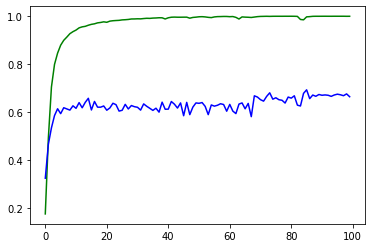

In [75]:
#plotting epochs and corresponding accuracies 
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'g',label='Training_accuracy')
plt.plot(epochs,val_accuracy,'b',label='val_accuracy')


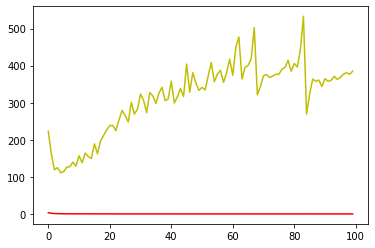

In [76]:
#plotting epochs and corresponding losses
plt.plot(epochs,loss,'r',label='loss')
plt.plot(epochs,val_loss,'y',label='val_loss')

In [77]:
#predicting the classes for xtest input
predicted_classes = model.predict_classes(xtest_gray)
y_true = ytest

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


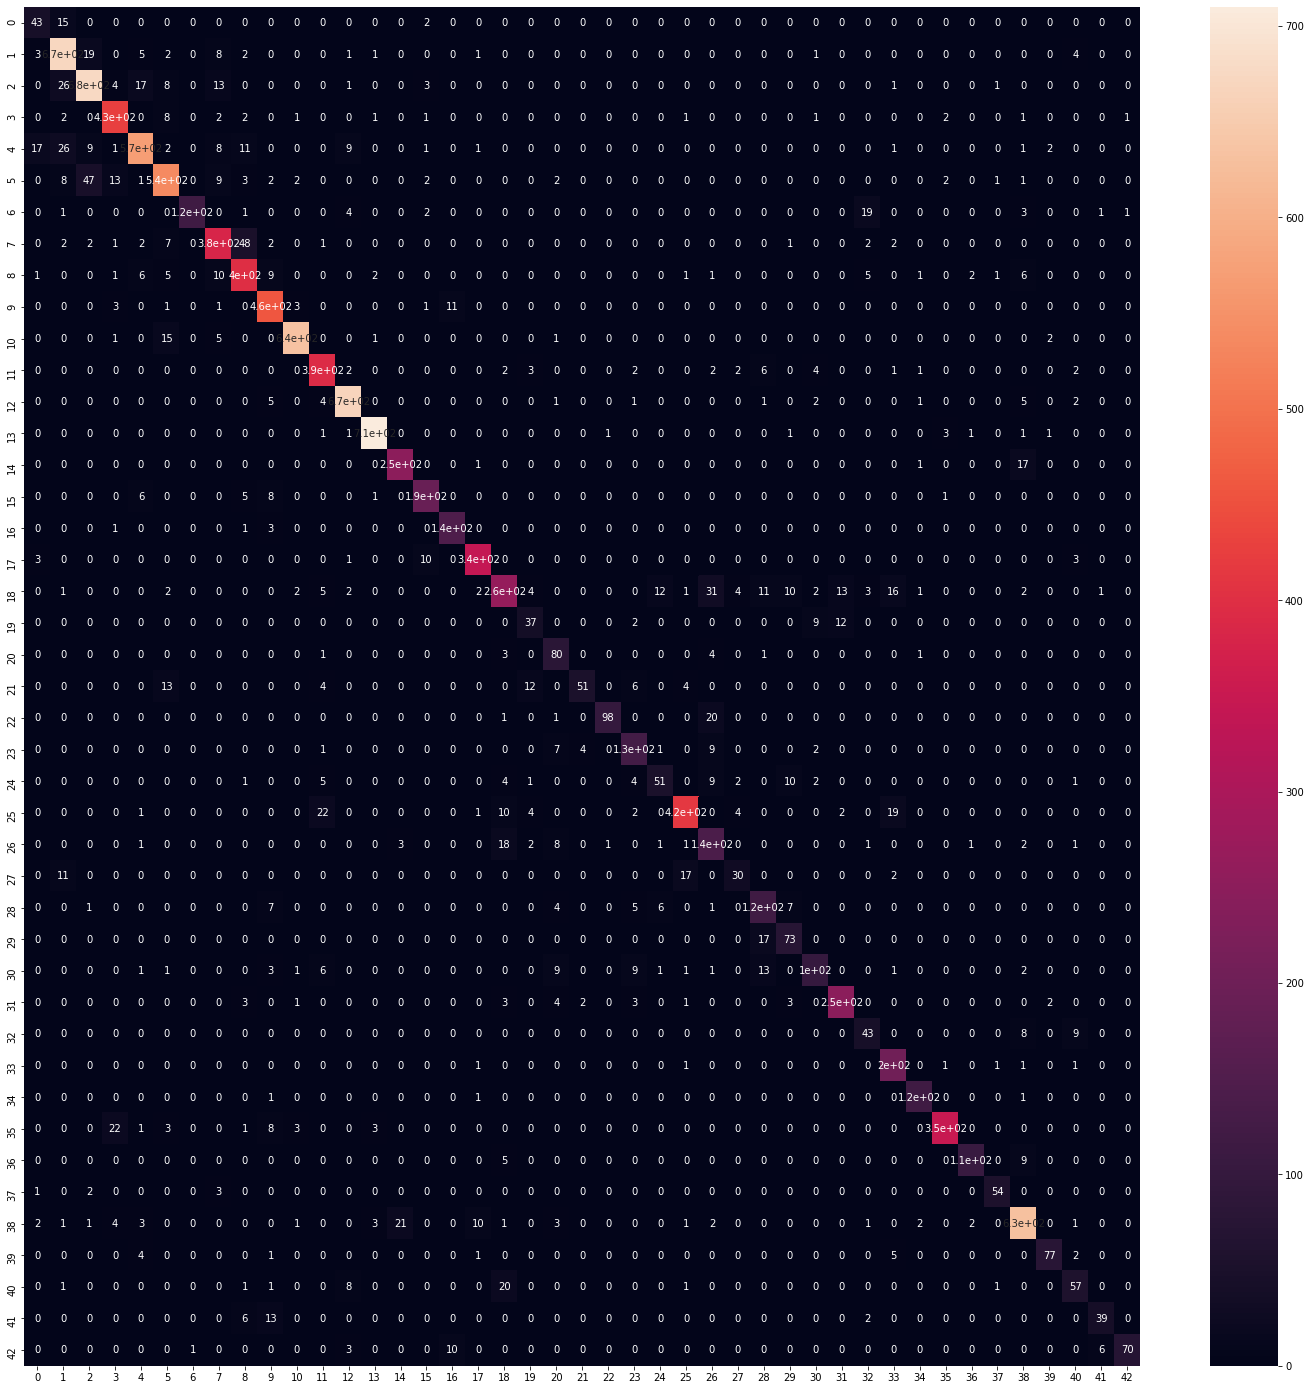

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

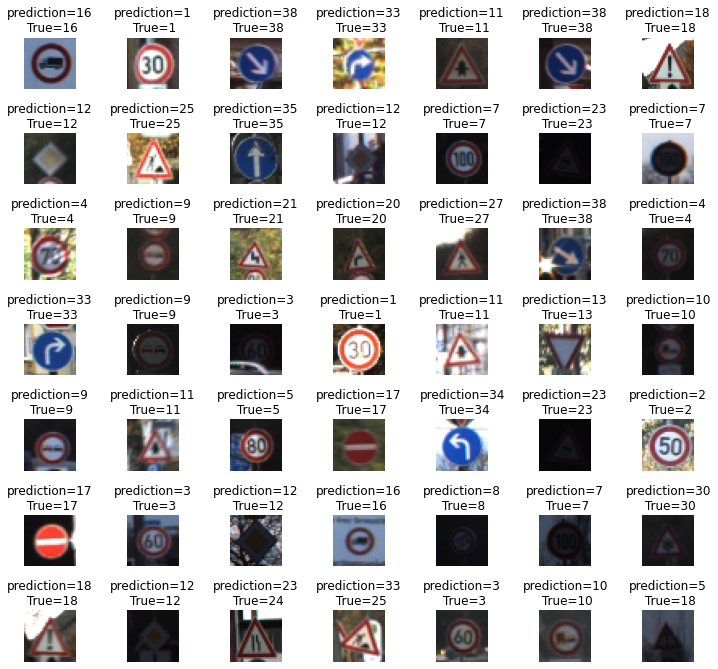

In [80]:
# It is done just to visualise some pictures and how the model performed
Length = 7
Width = 7
fig,axes=plt.subplots(Length,Width,figsize=(12,12))
axes = axes.ravel()

for i in range(0,Length*Width):
  axes[i].imshow(xtest[i])
  axes[i].set_title('prediction={}\n True={}'.format(predicted_classes[i],y_true[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1)

##conclusion


1. Final model has an accuracy of 88 percent on testing data on         performing 100 epochs with 0.001 learning rate. 
2. The network used is called Le-Net that was presented by Yann LeCun http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf